## 1) Feature Selection : Removing Constant Features

In [4]:
import numpy as np
import pandas as pd

In [5]:
data = pd.DataFrame(
    {"A" : [1, 2, 4, 1, 2, 4],
     "B" : [4, 5, 6, 7, 8, 9],
     "C" : [0, 0, 0, 0, 0, 0],
     "D" : [1, 1, 1, 1, 1, 1]
     }
)

In [15]:
for c in data.columns:
  print(c)

A
B
C
D


## Variance Threshold

Feature selector that removes all low variance features .
This feature selection algorithm looks only at the features (X), not the desired output (Y) , and can thus be used for unsupervised learning .

In [7]:
from sklearn.feature_selection import VarianceThreshold
var_thres = VarianceThreshold(threshold = 0)
var_thres.fit(data)

VarianceThreshold(threshold=0)

In [9]:
var_thres.get_support()

array([ True,  True, False, False])

In [10]:
data.columns[var_thres.get_support()]

Index(['A', 'B'], dtype='object')

In [16]:
const_cols = []

for cols in data.columns:
  if cols not in data.columns[var_thres.get_support()]:
    const_cols.append(cols)

In [17]:
const_cols

['C', 'D']

In [19]:
data.drop(const_cols, axis = 1)

,A,B
0,1,4
1,2,5
2,4,6
3,1,7
4,2,8
5,4,9


Implementing on Bigger dataset

In [21]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import VarianceThreshold

In [22]:
data = pd.read_csv('/content/sample_data/santander.csv')
data.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [23]:
data.shape

(76020, 371)

In [24]:
data.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [ ]:
x = data.drop(labels = ['TARGET'], axis = 1)

In [32]:
y = data['TARGET']

In [33]:
## Applying train test split
from sklearn.model_selection import train_test_split

x_train , y_train, x_test, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [36]:
print(x_train.shape, x_test.shape)

(53214, 370) (53214,)


In [37]:
## Applying variance threshold

var_threshold = VarianceThreshold(threshold = 0)
var_threshold.fit(x_train)

VarianceThreshold(threshold=0)

In [47]:
non_constant_var = x_train.columns[var_threshold.get_support()]

In [48]:
non_constant_var

Index(['ID', 'var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1',
       'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1',
       'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult1',
       'imp_op_var40_efect_ult3',
       ...
       'saldo_medio_var29_ult3', 'saldo_medio_var33_hace2',
       'saldo_medio_var33_hace3', 'saldo_medio_var33_ult1',
       'saldo_medio_var33_ult3', 'saldo_medio_var44_hace2',
       'saldo_medio_var44_hace3', 'saldo_medio_var44_ult1',
       'saldo_medio_var44_ult3', 'var38'],
      dtype='object', length=332)

In [56]:
constant_cols = []
for cols in x_train.columns:
  if cols not in non_constant_var:
    constant_cols.append(cols)

print(constant_cols)

['ind_var2_0', 'ind_var2', 'ind_var27_0', 'ind_var28_0', 'ind_var28', 'ind_var27', 'ind_var41', 'ind_var46_0', 'ind_var46', 'num_var27_0', 'num_var28_0', 'num_var28', 'num_var27', 'num_var41', 'num_var46_0', 'num_var46', 'saldo_var28', 'saldo_var27', 'saldo_var41', 'saldo_var46', 'delta_imp_reemb_var33_1y3', 'delta_num_reemb_var33_1y3', 'imp_amort_var18_hace3', 'imp_amort_var34_hace3', 'imp_reemb_var13_hace3', 'imp_reemb_var33_hace3', 'imp_reemb_var33_ult1', 'imp_trasp_var17_out_hace3', 'imp_trasp_var33_out_hace3', 'num_var2_0_ult1', 'num_var2_ult1', 'num_reemb_var13_hace3', 'num_reemb_var33_hace3', 'num_reemb_var33_ult1', 'num_trasp_var17_out_hace3', 'num_trasp_var33_out_hace3', 'saldo_var2_ult1', 'saldo_medio_var13_medio_hace3']


In [61]:
x_train.drop(constant_cols, axis = 1, inplace = True)

In [62]:
x_train.shape

(53214, 332)

## 2) Feature Selection : With Correlation

Removing the  features which are highly correlated

In [65]:
import matplotlib.pyplot as plt
%matplotlib inline

In [66]:
boston_data = pd.read_csv('/content/sample_data/HousingData.csv')
boston_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [ ]:
boston_data.shape

In [68]:
x = boston_data.drop("MEDV", axis = 1)
y = boston_data["MEDV"]

In [69]:
x.shape

(506, 13)

In [ ]:
y.shape

In [93]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state= 0)

In [94]:
print(x_train.shape, x_test.shape)

(354, 13) (152, 13)


In [95]:
import seaborn as sns

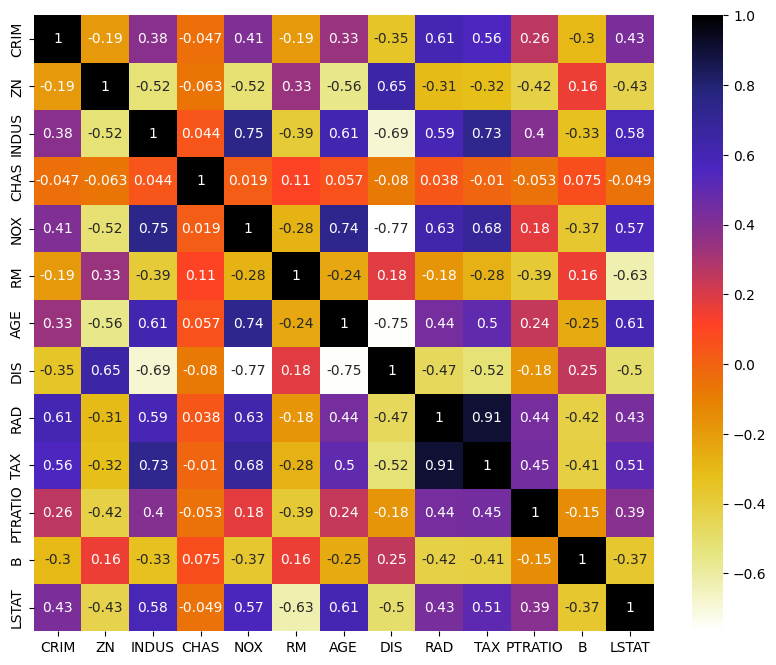

In [96]:
plt.figure(figsize = (10,8))
cor = x_train.corr()
sns.heatmap(cor, annot = True, cmap = plt.cm.CMRmap_r)
plt.show()

In [97]:
def correlation(dataset, threshold):
  col_corr = set()
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i, j]) > threshold:
        colname = corr_matrix.columns[i]
        col_corr.add(colname)

  return col_corr

corr_features = correlation(x_train, threshold = 0.7)
len(set(corr_features))

4

In [98]:
corr_features

{'AGE', 'DIS', 'NOX', 'TAX'}

In [99]:
x_train.drop(corr_features, axis = 1)

,CRIM,ZN,INDUS,CHAS,RM,RAD,PTRATIO,B,LSTAT
141,1.62864,0.0,21.89,0.0,5.019,4,21.2,396.90,34.41
272,0.11460,20.0,6.96,0.0,6.538,3,18.6,394.96,7.73
135,0.55778,0.0,21.89,0.0,6.335,4,21.2,394.67,16.96
298,0.06466,70.0,2.24,0.0,6.345,5,14.8,368.24,4.97
122,0.09299,0.0,25.65,0.0,5.961,2,19.1,378.09,17.93
...,...,...,...,...,...,...,...,...,...
323,0.28392,0.0,7.38,0.0,5.708,5,19.6,391.13,11.74
192,NaN,45.0,3.44,0.0,7.178,5,15.2,390.49,2.87
117,0.15098,0.0,10.01,0.0,6.021,6,17.8,394.51,10.30
47,0.22927,0.0,NaN,0.0,6.030,3,17.9,392.74,18.80


In [101]:
x_test.drop(corr_features, axis = 1)

,CRIM,ZN,INDUS,CHAS,RM,RAD,PTRATIO,B,LSTAT
329,0.06724,0.0,3.24,0.0,6.333,4,16.9,375.21,7.34
371,9.23230,0.0,18.10,0.0,6.216,24,20.2,366.15,9.53
219,0.11425,0.0,NaN,1.0,6.373,5,16.4,393.74,10.50
403,24.80170,0.0,18.10,0.0,5.349,24,20.2,396.90,19.77
78,0.05646,0.0,12.83,0.0,6.232,5,18.7,386.40,12.34
...,...,...,...,...,...,...,...,...,...
4,0.06905,0.0,2.18,0.0,7.147,3,18.7,396.90,NaN
428,7.36711,0.0,18.10,0.0,6.193,24,20.2,96.73,21.52
385,16.81180,0.0,18.10,0.0,5.277,24,20.2,396.90,30.81
308,0.49298,0.0,9.90,0.0,6.635,4,18.4,396.90,4.54


In [102]:
x_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
141,1.62864,0.0,21.89,0.0,0.624,5.019,100.0,1.4394,4,437,21.2,396.90,34.41
272,0.11460,20.0,6.96,0.0,0.464,6.538,58.7,3.9175,3,223,18.6,394.96,7.73
135,0.55778,0.0,21.89,0.0,0.624,6.335,98.2,2.1107,4,437,21.2,394.67,16.96
298,0.06466,70.0,2.24,0.0,0.400,6.345,20.1,7.8278,5,358,14.8,368.24,4.97
122,0.09299,0.0,25.65,0.0,0.581,5.961,92.9,2.0869,2,188,19.1,378.09,17.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,0.28392,0.0,7.38,0.0,0.493,5.708,74.3,4.7211,5,287,19.6,391.13,11.74
192,NaN,45.0,3.44,0.0,0.437,7.178,26.3,6.4798,5,398,15.2,390.49,2.87
117,0.15098,0.0,10.01,0.0,0.547,6.021,82.6,2.7474,6,432,17.8,394.51,10.30
47,0.22927,0.0,NaN,0.0,0.448,6.030,85.5,5.6894,3,233,17.9,392.74,18.80


In [103]:
x_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
329,0.06724,0.0,3.24,0.0,0.460,6.333,17.2,5.2146,4,430,16.9,375.21,7.34
371,9.23230,0.0,18.10,0.0,0.631,6.216,100.0,1.1691,24,666,20.2,366.15,9.53
219,0.11425,0.0,NaN,1.0,0.550,6.373,92.4,3.3633,5,276,16.4,393.74,10.50
403,24.80170,0.0,18.10,0.0,0.693,5.349,96.0,1.7028,24,666,20.2,396.90,19.77
78,0.05646,0.0,12.83,0.0,0.437,6.232,53.7,5.0141,5,398,18.7,386.40,12.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN
428,7.36711,0.0,18.10,0.0,0.679,6.193,78.1,1.9356,24,666,20.2,96.73,21.52
385,16.81180,0.0,18.10,0.0,0.700,5.277,98.1,1.4261,24,666,20.2,396.90,30.81
308,0.49298,0.0,9.90,0.0,0.544,6.635,82.5,3.3175,4,304,18.4,396.90,4.54
